# Lab 0 - Part II: Secrets of Happiness

In the first part of this lab, we learned how to use Python to run
different kinds of simulations, such as:

- generate a population with different characteristics,
- match individuals in the marriage market based on pre-defined criteria,
- generate the happiness score of each individual based on their characteristics.

At the end of last lab, we saved our data in a CSV file, called
`marriage_data.csv`. In this part, we will learn how to analyze the
data we generated with `R`.

Most of the time, you just need to run the code in the cells below by
clicking on the "Run" button. If you see `# Change the code below` in
the cell, you need to modify the code before running it.

In [29]:
# load libraries and some helper functions
library(pacman)
p_load(data.table, magrittr, ggplot2, knitr, psych)

# color palette
gray_scale <- c('#F3F4F8','#D2D4DA', '#B3B5BD', 
                '#9496A1', '#7d7f89', '#777986', 
                '#656673', '#5B5D6B', '#4d505e',
                '#404352', '#2b2d3b', '#282A3A',
                '#1b1c2a', '#191a2b',
                '#141626', '#101223')

ft_palette <- c('#990F3D', '#0D7680', '#0F5499', '#262A33', '#FFF1E5')

ft_contrast <- c('#F83', '#00A0DD', '#C00', '#006F9B', '#F2DFCE', '#FF7FAA',
                 '#00994D', '#593380')

peep_head <- function(dt, n = 5) {
    dt %>%
        head(n) %>%
        kable()
}

peep_sample <- function(dt, n = 5) {
    dt %>%
        .[sample(.N, n)] %>%
        kable()
}

peep_tail <- function(dt, n = 5) {
    dt %>%
        tail(n) %>%
        kable()
}

## First step of data analysis: Load the data

The first step of data analysis is to load the data. We will use the
`fread` function from the `data.table` package to load the data. The
`fread` means file read, and it is a very fast function to read data
from a file.

In [2]:
# mdt means marriage data table
# you can name it whatever you want
mdt <- fread("../data/marriage_data.csv")

In [3]:
# check the structure of the data
str(mdt)

Classes ‘data.table’ and 'data.frame':	20000 obs. of  12 variables:
 $ id               : int  11064 71744 2923 99072 71402 39880 43238 61867 7139 31257 ...
 $ name             : chr  "zczczy" "psbrqc" "aftchs" "yqixuc" ...
 $ age              : int  28 45 21 30 17 34 17 35 39 21 ...
 $ income           : num  207 3040 7384 448 1862 ...
 $ openness         : num  32.7 37.8 40.5 47 44.2 ...
 $ conscientiousness: num  53.1 65.3 55.5 49.6 37.1 ...
 $ extraversion     : num  42.2 55.3 51.2 46.4 34 ...
 $ agreeableness    : num  45 70.5 21.1 32.4 53 ...
 $ neuroticism      : num  22.6 35.4 62.4 46.3 46.9 ...
 $ tolerance        : num  38.3 46.8 26.9 32.1 30.1 ...
 $ matched_id       : int  37741 93175 21289 54307 78385 NA 71664 65469 69740 6472 ...
 $ happiness        : num  52.8 74 67.7 50.8 68 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [19]:
head(mdt)

id,name,age,income,openness,conscientiousness,extraversion,agreeableness,neuroticism,tolerance,matched_id,happiness
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
11064,zczczy,28,207.03,32.67,53.08,42.21,45.01,22.63,38.32,37741,52.81
71744,psbrqc,45,3039.66,37.80,65.26,55.34,70.52,35.35,46.76,93175,73.96
2923,aftchs,21,7384.21,40.51,55.45,51.17,21.11,62.40,26.95,21289,67.69
99072,yqixuc,30,447.91,46.97,49.60,46.38,32.44,46.33,32.08,54307,50.80
71402,nznyji,17,1862.44,44.17,37.12,34.04,53.01,46.85,30.11,78385,67.96
39880,snnkvl,34,23982.03,51.20,51.57,47.39,49.45,60.25,30.93,NA,126.60


In [20]:
tail(mdt)

id,name,age,income,openness,conscientiousness,extraversion,agreeableness,neuroticism,tolerance,matched_id,happiness
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
71133,arogjy,47,19014.66,47.17,59.63,48.19,48.11,33.86,33.04,NA,111.12
70277,lloxln,57,3546.12,64.75,57.08,43.23,38.71,43.95,32.15,25473,73.03
88672,zjineg,43,537.49,47.07,53.94,58.64,44.15,50.38,24.02,44516,48.44
54353,qkxlyo,56,1452.79,45.59,73.13,48.31,48.42,53.30,30.80,48839,60.76
93126,oojewk,40,1392.97,66.28,44.09,41.29,61.00,54.91,16.67,95375,59.71
9315,ovtusv,20,11471.32,58.54,51.26,50.42,37.02,48.75,27.86,93396,93.56


## What's the share of married people in the population?

From the first part of this lab, we know that people who are married
should have a `matched_id` different from `NA`. We can use this
information to calculate the share of married people in the
population.

In [9]:
# how many people are single?
# is.na() function is used to check missing values
# .N is a special symbol in data.table to calculate the number of rows
mdt %>%
    .[is.na(matched_id), .N]

[1] 2391


In [16]:
# with means with the dataset
# table gives the frequency of each unique value
# prop.table gives the proportion of each unique value
mdt %>%
    with(table(is.na(matched_id))) %>%
    prop.table() %>%
    round(4)


 FALSE   TRUE 
0.8804 0.1196 

As the above results show that we have around $88.04\%$ of married
people in the population and $11.96\%$ of single people.

## Distribution of Variables

Now, we want to check the distribution of the variables in the
population. We will try to find out whether the variables are normally
distributed or not.

In [15]:
# let's check the age first
mdt %>%
    with(summary(age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   27.00   38.00   37.92   49.00   60.00 

In [18]:
mdt %>%
    .[, .(age)] %>%
    head()

age
<int>
28
45
21
30
17
34


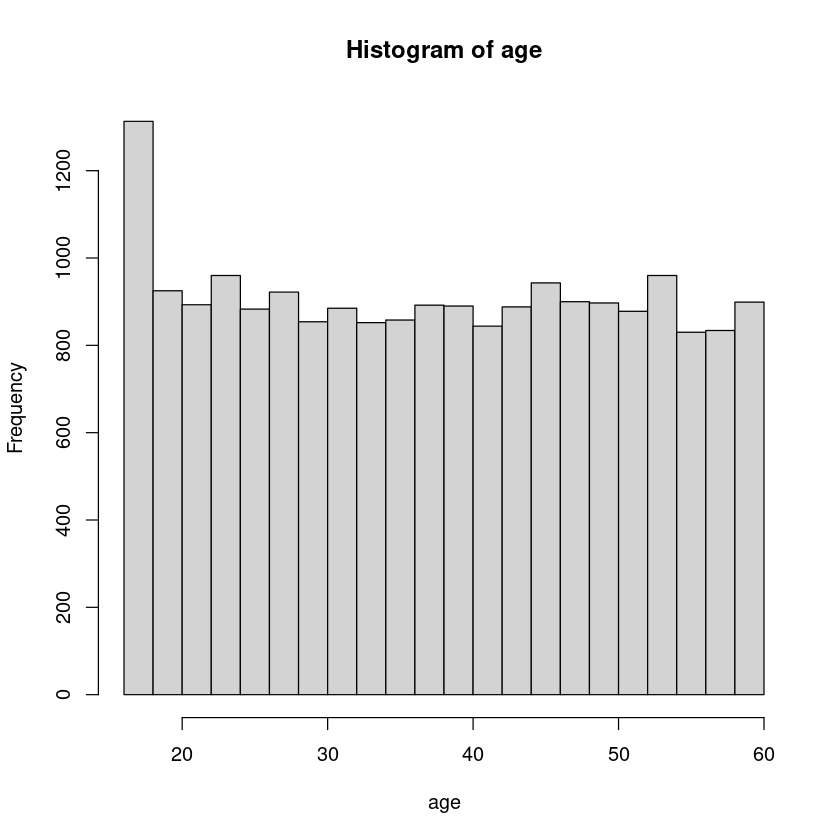

In [21]:
mdt %>%
    with(hist(age, breaks = 20))

It looks like the `age` variable follows the uniform distribution, which
means that the age of people in the population is uniformly
distributed.

In [22]:
# now let's check the income
mdt %>%
    with(summary(income))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    65.23   1524.62   2980.26   4858.99   5836.71 123941.30 

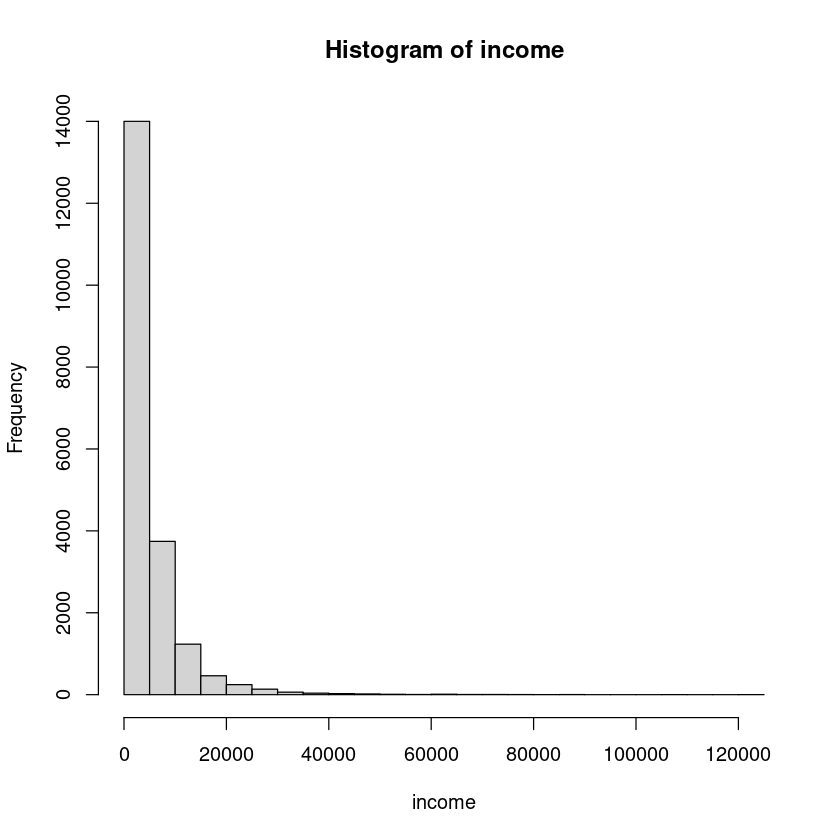

In [23]:
mdt %>%
    with(hist(income, breaks = 20))

The distribution of the `income` variable is right-skewed, which means
that most people have low income, and only a few people have high
income. This is consistent with the real world. However the log
transformation of the `income` variable is normally distributed
as it is shown in the following figure.

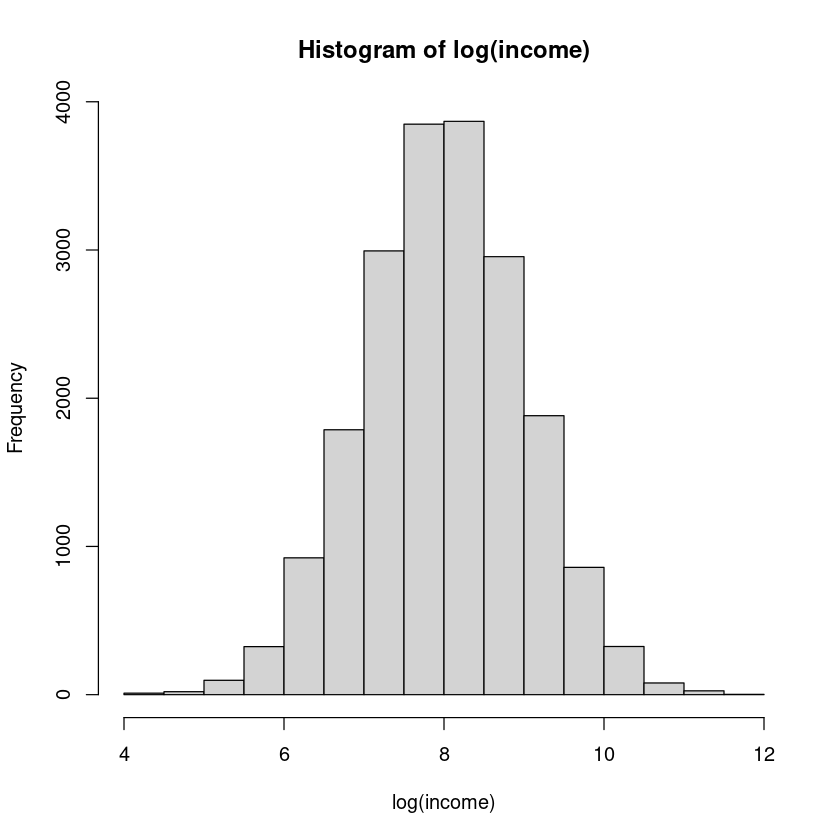

In [25]:
# do the log transformation
mdt %>%
    with(hist(log(income), breaks = 20))

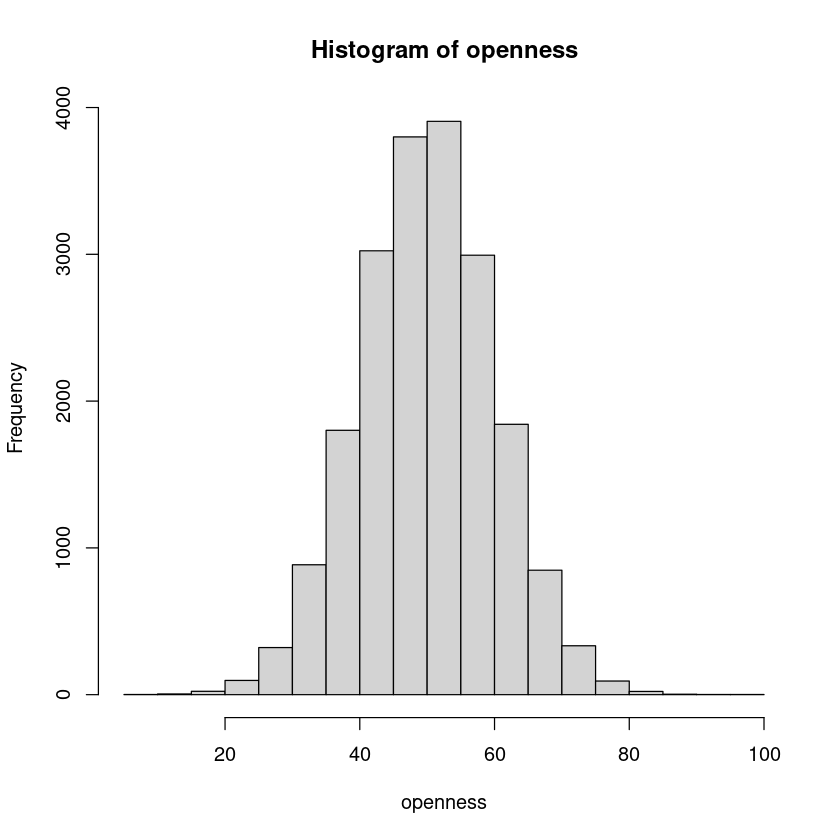

In [26]:
# distribution of openess
mdt %>%
    with(hist(openness, breaks = 20))

## Plot distribution of selected variables at one time

In [27]:
str(mdt)

Classes ‘data.table’ and 'data.frame':	20000 obs. of  12 variables:
 $ id               : int  11064 71744 2923 99072 71402 39880 43238 61867 7139 31257 ...
 $ name             : chr  "zczczy" "psbrqc" "aftchs" "yqixuc" ...
 $ age              : int  28 45 21 30 17 34 17 35 39 21 ...
 $ income           : num  207 3040 7384 448 1862 ...
 $ openness         : num  32.7 37.8 40.5 47 44.2 ...
 $ conscientiousness: num  53.1 65.3 55.5 49.6 37.1 ...
 $ extraversion     : num  42.2 55.3 51.2 46.4 34 ...
 $ agreeableness    : num  45 70.5 21.1 32.4 53 ...
 $ neuroticism      : num  22.6 35.4 62.4 46.3 46.9 ...
 $ tolerance        : num  38.3 46.8 26.9 32.1 30.1 ...
 $ matched_id       : int  37741 93175 21289 54307 78385 NA 71664 65469 69740 6472 ...
 $ happiness        : num  52.8 74 67.7 50.8 68 ...
 - attr(*, ".internal.selfref")=<externalptr> 


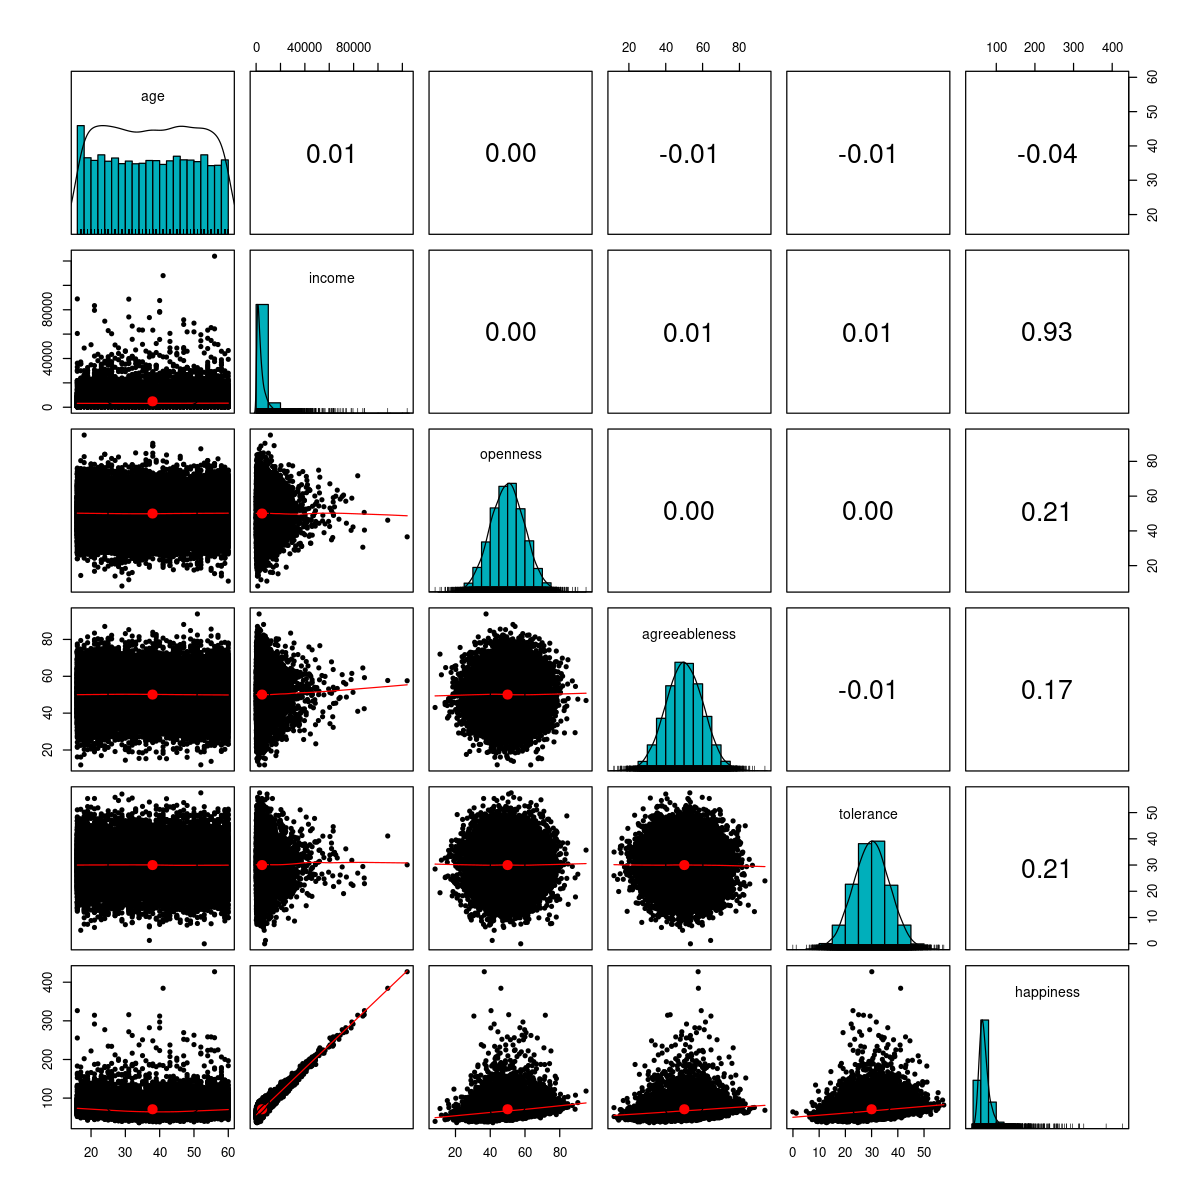

In [34]:
# chagne figure size
options(repr.plot.width = 10, repr.plot.height = 10)
mdt %>%
    .[, .(age, income, openness, agreeableness, tolerance, happiness)] %>%
    pairs.panels(
        method = "pearson", # correlation method
        hist.col = "#00AFBB",
        density = TRUE,  # show density plots
    )